In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.image import imread
import seaborn as sns
import os
import random
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
# import tensorflow.keras as keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout
from tensorflow.keras.models import load_model
from tensorflow.keras.applications.efficientnet import EfficientNetB1
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image

In [2]:
dir = r"C:\Users\alvar\Clasificación_NGMP"
os.listdir(dir)

['test', 'train', 'val']

In [3]:
train_path = dir + '/train/'
test_path = dir + '/test/'
validation_path = dir + '/val/'
print("train path:", train_path)
print("test path:", test_path)
print("validation path:", validation_path)

train path: C:\Users\alvar\Clasificación_NGMP/train/
test path: C:\Users\alvar\Clasificación_NGMP/test/
validation path: C:\Users\alvar\Clasificación_NGMP/val/


In [4]:
os.listdir(test_path)

['Glioma', 'Meningioma', 'No tumor', 'Pituitaria']

In [5]:
image_generator = ImageDataGenerator(rotation_range=20,
                                     width_shift_range=0.1,
                                     height_shift_range=0.1,
                                     zoom_range=0.1,
                                     horizontal_flip=True)

In [6]:
image_generator.flow_from_directory(train_path)

Found 1888 images belonging to 4 classes.


In [7]:
image_generator.flow_from_directory(test_path)

Found 394 images belonging to 4 classes.


In [8]:
image_generator.flow_from_directory(validation_path)

Found 982 images belonging to 4 classes.


In [ ]:
##Modelo EfficientNetB1

In [9]:
eff_net_model = EfficientNetB1(
                    include_top=False,
                    weights='imagenet',
                    input_shape=(240,240,3),
                    pooling='max',
                    classes= 4
                )

for layer in eff_net_model.layers:
    layer.trainable = False

In [10]:
model = Sequential([
    eff_net_model,
    Dense(2560, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),  # Dropout del 50%
    Dense(1280, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),  # Dropout del 50%
    Dense(1024, activation='relu'),
    Dropout(0.3),  # Dropout del 30%
    Dense(4, activation='softmax')
])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb1 (Functional)  (None, 1280)             6575239   
                                                                 
 dense (Dense)               (None, 2560)              3279360   
                                                                 
 batch_normalization (BatchN  (None, 2560)             10240     
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 2560)              0         
                                                                 
 dense_1 (Dense)             (None, 1280)              3278080   
                                                                 
 batch_normalization_1 (Batc  (None, 1280)             5120      
 hNormalization)                                        

In [12]:
Modelo_class_1 con tasa de aprendizaje 0.001 y 8 etapas y batchsize = 32 Dropout

SyntaxError: invalid syntax (3800630357.py, line 1)

In [13]:
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=1e-04) ,loss = 'categorical_crossentropy',metrics = 'accuracy')

In [14]:
batch_size = 64

In [15]:
train_image_generator = image_generator.flow_from_directory(train_path,
                                                            target_size=(240, 240),
                                                            color_mode='rgb',
                                                            batch_size=batch_size,
                                                            class_mode='categorical')

Found 1888 images belonging to 4 classes.


In [16]:
validation_image_generator = image_generator.flow_from_directory(validation_path,
                                                            target_size=(240, 240),
                                                            color_mode='rgb',
                                                            batch_size=batch_size,
                                                            class_mode='categorical')

Found 982 images belonging to 4 classes.


In [17]:
test_image_generator = image_generator.flow_from_directory(test_path,
                                                            target_size=(240, 240),
                                                            color_mode='rgb',
                                                            batch_size=batch_size,
                                                            class_mode='categorical',
                                                            shuffle = False)

Found 394 images belonging to 4 classes.


In [ ]:
#Al emplear Image_generator se están aplicando aumento de imágenes directamente en linea, no se copian las imágenes aumentadas a un nuevo directorio.

In [18]:
history = model.fit(train_image_generator, validation_data=validation_image_generator, epochs=30)

Epoch 1/30
30/30 [==============================] - 101s 3s/step - loss: 1.5831 - accuracy: 0.4147 - val_loss: 1.0357 - val_accuracy: 0.6130
Epoch 2/30
30/30 [==============================] - 134s 5s/step - loss: 1.0854 - accuracy: 0.5959 - val_loss: 0.8085 - val_accuracy: 0.7128
Epoch 3/30
30/30 [==============================] - 148s 5s/step - loss: 0.8873 - accuracy: 0.6748 - val_loss: 0.7586 - val_accuracy: 0.7067
Epoch 4/30
30/30 [==============================] - 67s 2s/step - loss: 0.7998 - accuracy: 0.7076 - val_loss: 0.6265 - val_accuracy: 0.7627
Epoch 5/30
30/30 [==============================] - 61s 2s/step - loss: 0.7037 - accuracy: 0.7474 - val_loss: 0.6031 - val_accuracy: 0.7749
Epoch 6/30
30/30 [==============================] - 62s 2s/step - loss: 0.7106 - accuracy: 0.7436 - val_loss: 0.4872 - val_accuracy: 0.8004
Epoch 7/30
30/30 [==============================] - 63s 2s/step - loss: 0.6534 - accuracy: 0.7659 - val_loss: 0.4609 - val_accuracy: 0.8086
Epoch 8/30
30/30 

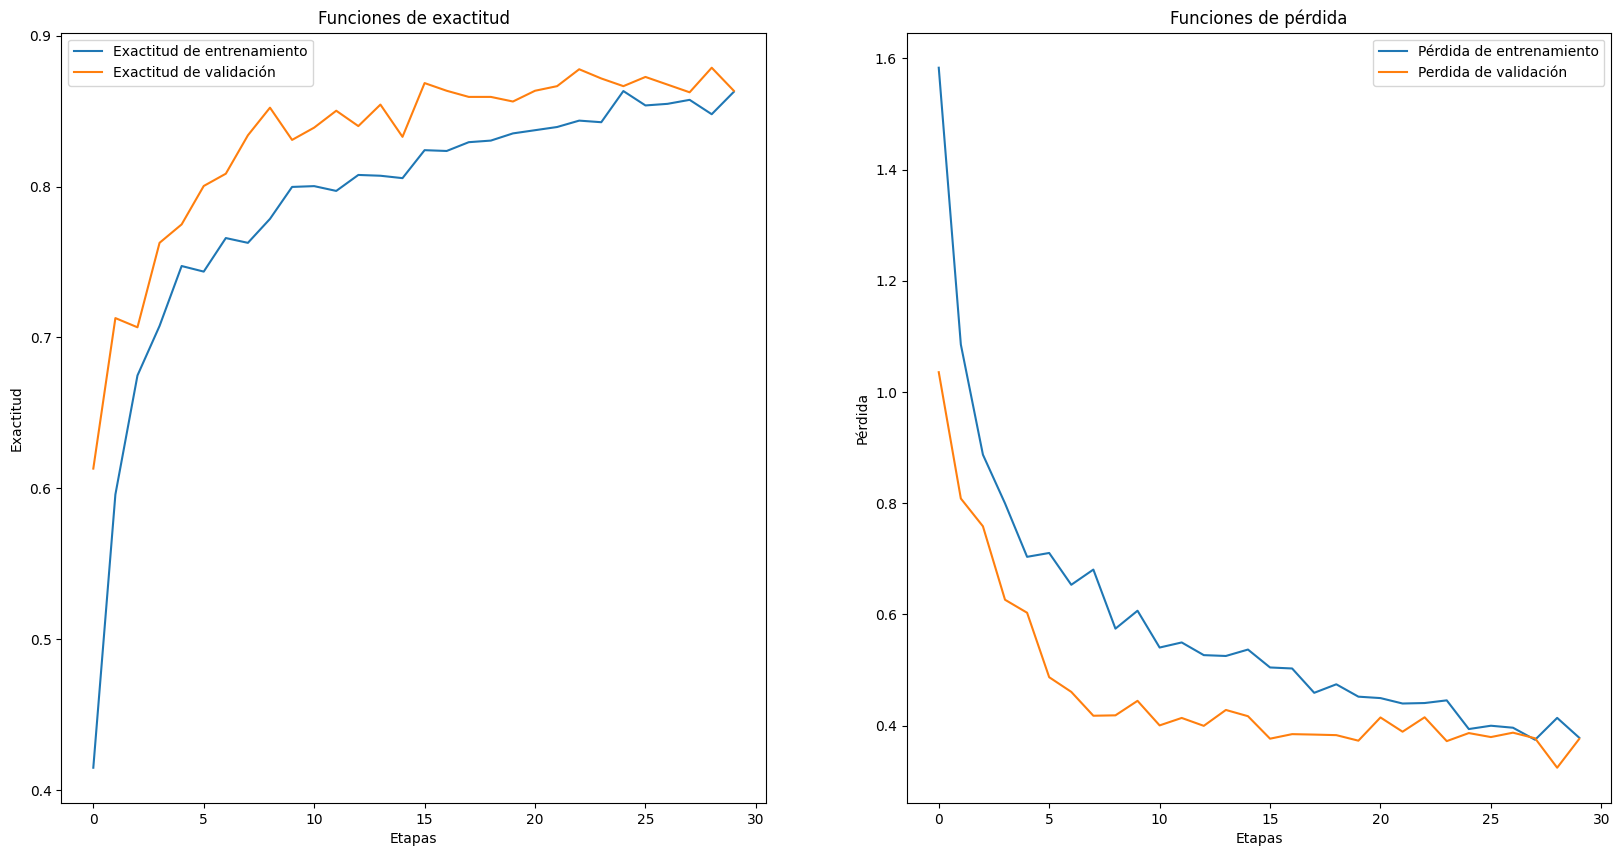

In [19]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (20,10))

ax[0].plot(acc, label = 'Exactitud de entrenamiento')
ax[0].plot(val_acc, label = 'Exactitud de validación')
ax[0].set_xlabel('Etapas')
ax[0].set_ylabel('Exactitud')
ax[0].set_title('Funciones de exactitud')
ax[0].legend()


ax[1].plot(loss, label = 'Pérdida de entrenamiento')
ax[1].plot(val_loss, label = 'Perdida de validación')
ax[1].set_xlabel('Etapas')
ax[1].set_ylabel('Pérdida')
ax[1].set_title('Funciones de pérdida')
ax[1].legend()

In [20]:
# Predicción sobre los datos de prueba
y_pred_probs = model.predict(test_image_generator, steps=len(test_image_generator), verbose=1)

# Convertir probabilidades en clases predichas (índices)
y_pred = np.argmax(y_pred_probs, axis=1)
print(y_pred)
# Extraer las etiquetas reales desde el generador
y_true = test_image_generator.classes
print(y_true)

7/7 [==============================] - 27s 3s/step
[0 1 2 1 1 0 1 2 2 1 2 2 3 1 0 3 2 0 0 2 2 0 0 2 1 1 0 1 1 0 0 1 0 1 1 0 2
 1 0 2 0 0 2 3 1 0 2 1 0 1 2 2 2 2 2 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 1 1 0 0 2 0 2 0 1 1 0 1 2 2 1 1 0 2 1 1 0 1 0 0 0 1 1 1 1 1 1 2 1 1 1 1
 2 1 1 1 1 1 1 1 1 1 1 1 1 2 1 3 1 1 1 1 1 1 1 1 1 1 0 1 2 1 1 1 1 3 1 0 1
 1 1 1 1 3 1 1 1 1 0 1 2 3 1 1 1 3 1 1 1 1 2 1 1 1 3 1 1 1 1 1 1 1 1 1 2 1
 1 3 1 1 1 1 1 3 1 1 2 1 1 1 2 1 1 1 1 1 1 1 1 2 1 1 2 1 1 1 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 1 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 1 3 3 3 3 3 2 3 3 3 3 3 3 3
 3 3 1 3 3 3 3 2 3 3 3 3 2 0 2 3 3 3 3 3 3 0 0 2 3 3 3 2 3 3 3 3 3 3 3 3 3
 3 3 1 2 1 1 3 1 3 3 1 3 3 3 3 2 3 3 3 3 3 3 3 3]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

In [23]:
label_map = {
    0: 'glioma_tumor',
    1: 'meningioma_tumor',
    2: 'no_tumor',
    3: 'pituitary_tumor'
}

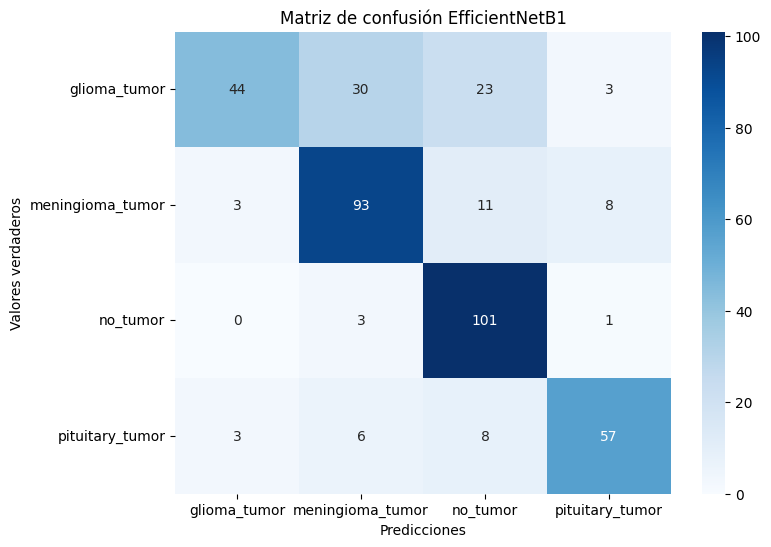

                  precision    recall  f1-score   support

    glioma_tumor       0.88      0.44      0.59       100
meningioma_tumor       0.70      0.81      0.75       115
        no_tumor       0.71      0.96      0.81       105
 pituitary_tumor       0.83      0.77      0.80        74

        accuracy                           0.75       394
       macro avg       0.78      0.75      0.74       394
    weighted avg       0.77      0.75      0.74       394



In [26]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular matriz de confusión
conf_matrix = confusion_matrix(y_true, y_pred)

# Mostrar la matriz de confusión como un mapa de calor
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["glioma_tumor", "meningioma_tumor", "no_tumor", "pituitary_tumor"], yticklabels=["glioma_tumor", "meningioma_tumor", "no_tumor", "pituitary_tumor"])
plt.xlabel("Predicciones")
plt.ylabel("Valores verdaderos")
plt.title("Matriz de confusión EfficientNetB1")
plt.show()

# Imprimir un reporte de clasificación
report = classification_report(y_true, y_pred, target_names=["glioma_tumor", "meningioma_tumor", "no_tumor", "pituitary_tumor"])
print(report)

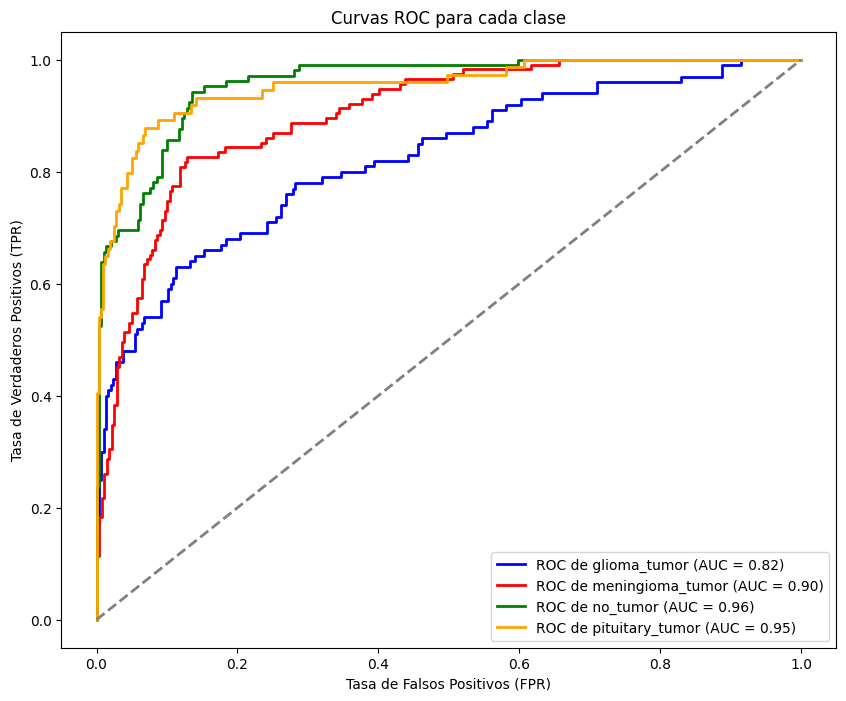

In [31]:
from sklearn.metrics import roc_curve, auc, RocCurveDisplay
from sklearn.preprocessing import label_binarize

# Binarizamos las etiquetas reales (one-hot encoding)
n_classes = 4  # Número de clases
y_true_bin = label_binarize(y_true, classes=list(label_map.keys()))

# Curvas ROC para cada clase
fpr = dict()
tpr = dict()
roc_auc = dict()

# Calcular fpr, tpr y AUC para cada clase
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_pred_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Graficar todas las curvas ROC
plt.figure(figsize=(10, 8))
colors = ['blue', 'red', 'green', 'orange']
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], color=colors[i], lw=2,
             label=f'ROC de {label_map[i]} (AUC = {roc_auc[i]:.2f})')

# Agregar línea base
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')

# Personalización del gráfico
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curvas ROC para cada clase')
plt.legend(loc='lower right')
plt.show()